M2780.002400 Machine Listening (Fall 2020)

Instructor: Kyogu Lee (kglee@snu.ac.kr)

# Assignment 3: Music Analysis

(80 points)

Due Date : This assignment is due by 12:59PM, September 29 (Tuesday)



---

Assignment

This assignment is composed of only one part: Lab assignment, you will need to write Notebook scripts and/or functions as required and submit them electronically (via **ETL**) by the end of the due date.

# Lab (80pts)

For all lab assignments, submit your Notebook file (.ipynb) and plots(.png) via **ETL**. The Notebook file should be named with your full name and the homework number – e.g., JohnDoe_hw2.ipynb. 

In addition to writing Python scripts and/or functions in your Notebook file, there are also questions you’ll have to answer. For such questions, you should provide answers in your Notebook file using Text sections.

**Please submit the codes executed (make sure that the results of your codes are visible in the submitted assignments) so that the grader can check whether the code is working or not.**

In [4]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import hamming
from scipy.fftpack import fft
from __future__ import division
import os
import json


---


1.   Onset Detection (40 pts)
 
 Lab3 has onset detection algorithms that use the time-domain, frequency-domain, and phase-based features. 


*   a. Download T39-piano-8k.wav and T08-violin-8k.wav clips from the course homepage. Save onset detection results as image for each clip and each onset detection algorithms. The image should be named as INSTUMENT_#ofLAB_method.png, for example, a figure that uses a piano clip in lab4 should be titled piano_4_time_domain.png.


In [47]:
piano_path = './lab3/wav/T39-piano-8k.wav'
piano, sr = librosa.load(piano_path, sr=None)
ipd.Audio(piano, rate=sr, autoplay=False)

In [49]:
violin_path = '../as_2/lab2/wav/T08-violin-8k.wav'
violin, sr = librosa.load(violin_path, sr=None)
ipd.Audio(violin, rate=sr, autoplay=False)

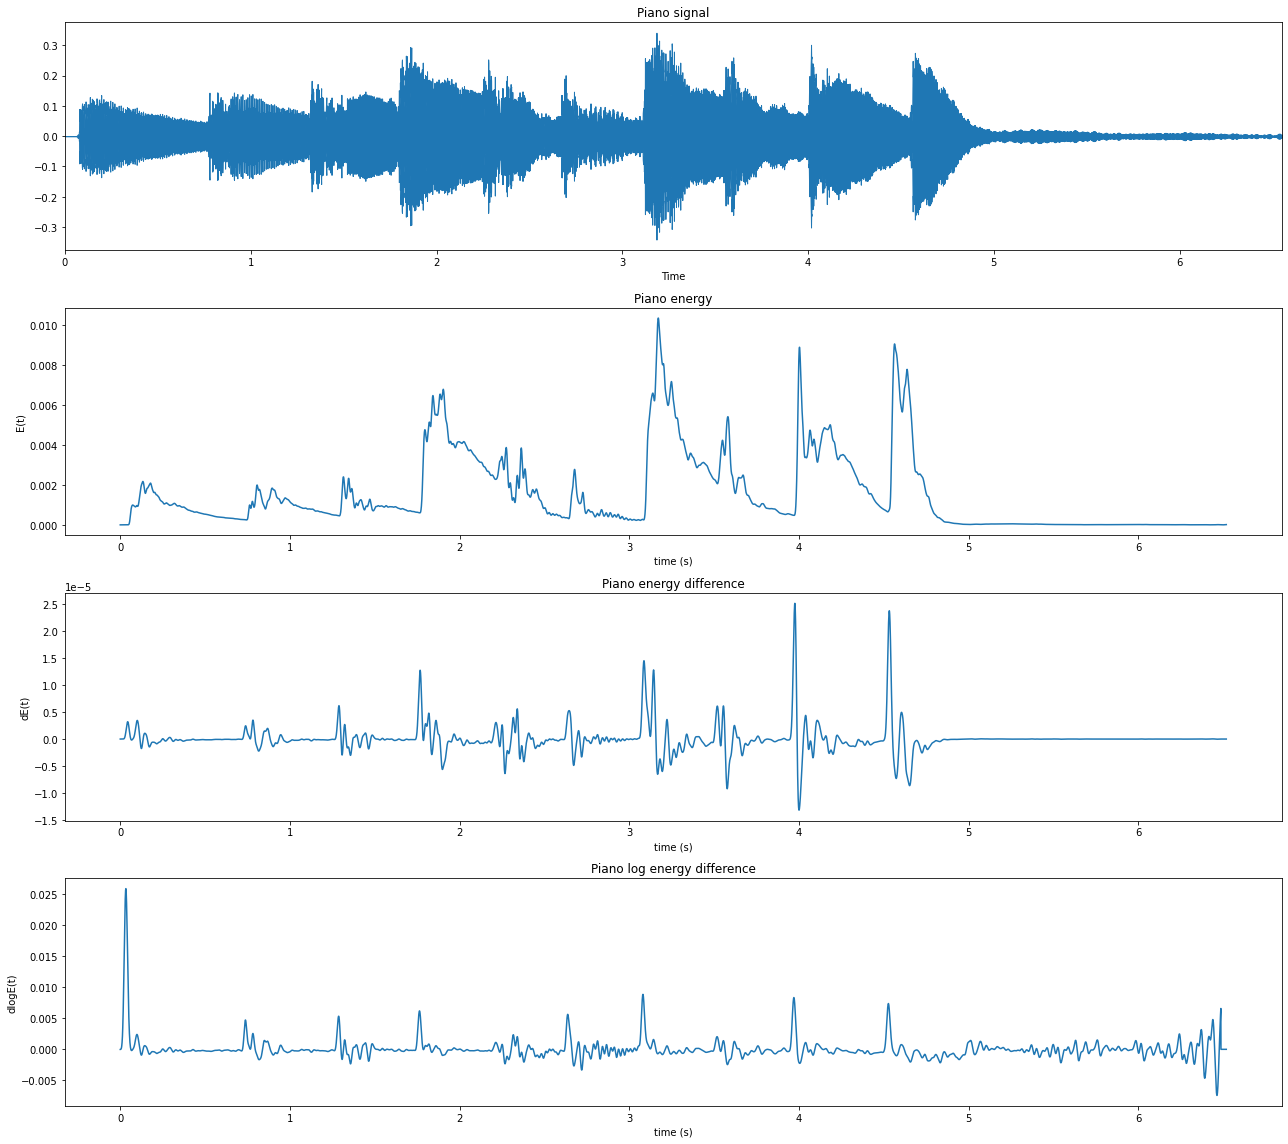

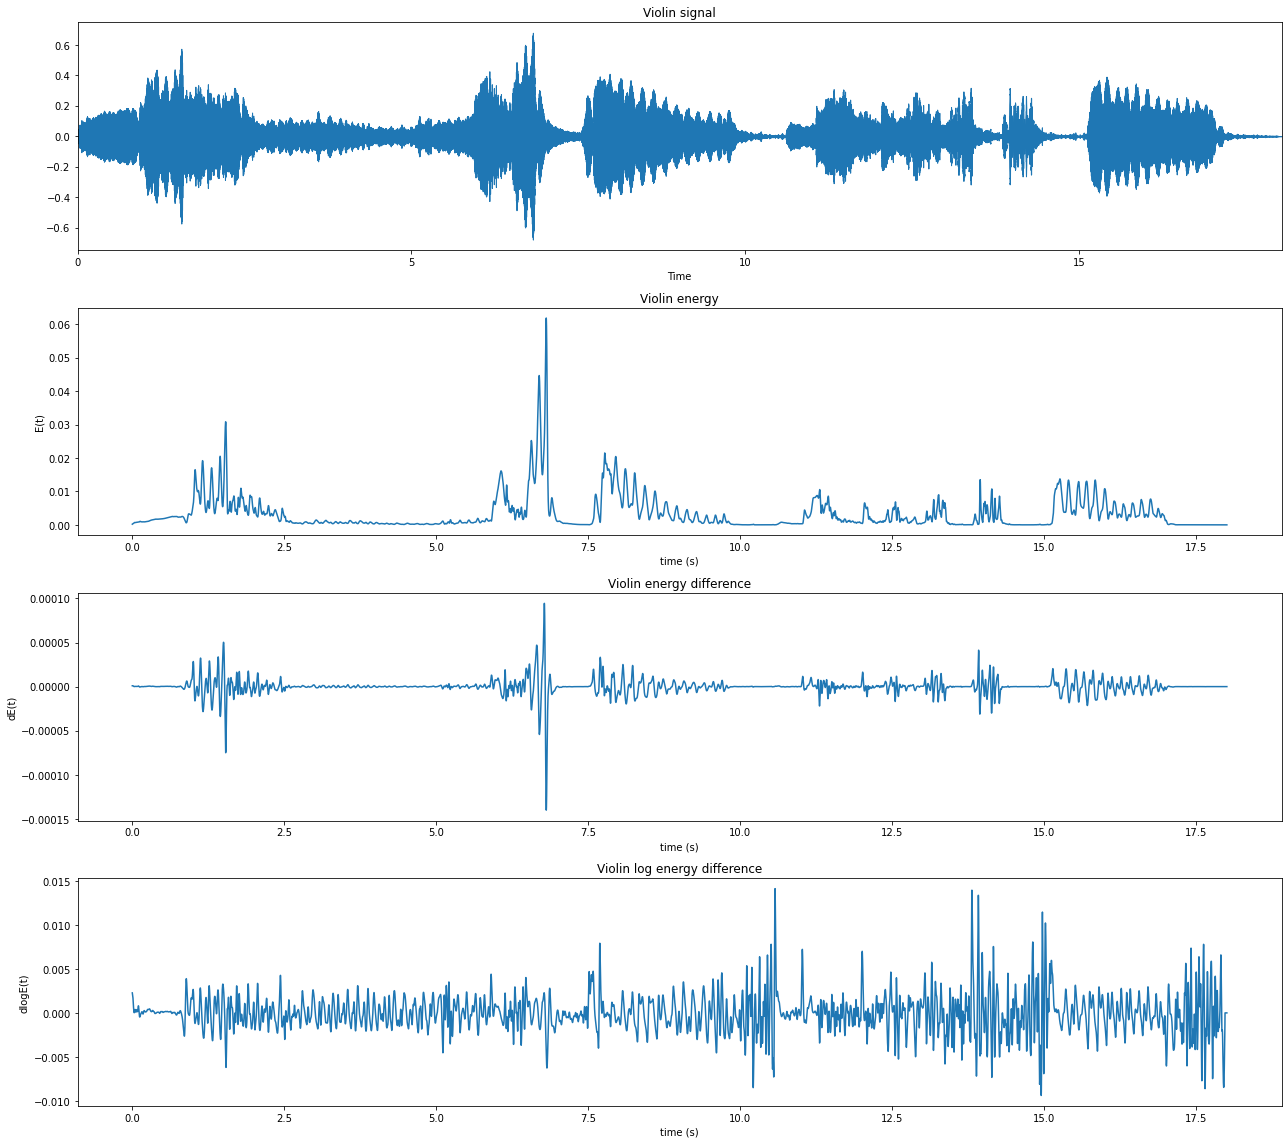

In [60]:
# Time Domain Onset Detection

M = 256
window = np.hamming(M)

# piano
e = np.zeros(len(piano)-M)
for i in range(0,len(piano)-M):
  e[i] = np.sum(np.square(np.multiply(piano[i:i+M],window)))/M

de = np.zeros(len(piano)-M)
diffe = np.diff(e)
for i in range(0,len(diffe)-M):
  de[i] = np.sum(np.multiply(diffe[i:i+M],window))/M
dloge = np.zeros(len(piano)-M)
diffloge = np.diff(np.log(e + 0.0000001))
for i in range(0,len(diffloge)-M):
  dloge[i] = np.sum(np.multiply(diffloge[i:i+M],window))/M
                
time_index = np.arange(len(piano)-M)/sr
plt.figure(figsize=(18,16))
plt.subplot(4,1,1)
# plt.figure(figsize=(10, 4))
librosa.display.waveplot(piano, sr)
plt.title('Piano signal')
       
plt.subplot(4,1,2)
#plt.figure(figsize=(10, 4))
plt.plot(time_index,e)
plt.title('Piano energy')
plt.xlabel('time (s)')
plt.ylabel('E(t)')

plt.subplot(4,1,3)
#plt.figure(figsize=(10, 4))
plt.plot(time_index,de)
plt.title('Piano energy difference')
plt.xlabel('time (s)')
plt.ylabel('dE(t)')

plt.subplot(4,1,4)
#plt.figure(figsize=(10, 4))
plt.plot(time_index,dloge)
plt.title('Piano log energy difference')
plt.xlabel('time (s)')
plt.ylabel('dlogE(t)')
plt.tight_layout()
plt.savefig('./piano_3_time_domain.png')
plt.show()

# violin
e = np.zeros(len(violin)-M)
for i in range(0,len(violin)-M):
  e[i] = np.sum(np.square(np.multiply(violin[i:i+M],window)))/M

de = np.zeros(len(violin)-M)
diffe = np.diff(e)
for i in range(0,len(diffe)-M):
  de[i] = np.sum(np.multiply(diffe[i:i+M],window))/M

dloge = np.zeros(len(violin)-M)
diffloge = np.diff(np.log(e + 0.0000001))
for i in range(0,len(diffloge)-M):
  dloge[i] = np.sum(np.multiply(diffloge[i:i+M],window))/M

time_index = np.arange(len(violin)-M)/sr
plt.figure(figsize=(18,16))
plt.subplot(4,1,1)
# plt.figure(figsize=(10, 4))
librosa.display.waveplot(violin, sr)
plt.title('Violin signal')
       
plt.subplot(4,1,2)
#plt.figure(figsize=(10, 4))
plt.plot(time_index,e)
plt.title('Violin energy')
plt.xlabel('time (s)')
plt.ylabel('E(t)')

plt.subplot(4,1,3)
#plt.figure(figsize=(10, 4))
plt.plot(time_index,de)
plt.title('Violin energy difference')
plt.xlabel('time (s)')
plt.ylabel('dE(t)')

plt.subplot(4,1,4)
#plt.figure(figsize=(10, 4))
plt.plot(time_index,dloge)
plt.title('Violin log energy difference')
plt.xlabel('time (s)')
plt.ylabel('dlogE(t)')
plt.tight_layout()
plt.savefig('./violin_3_time_domain.png')
plt.show()

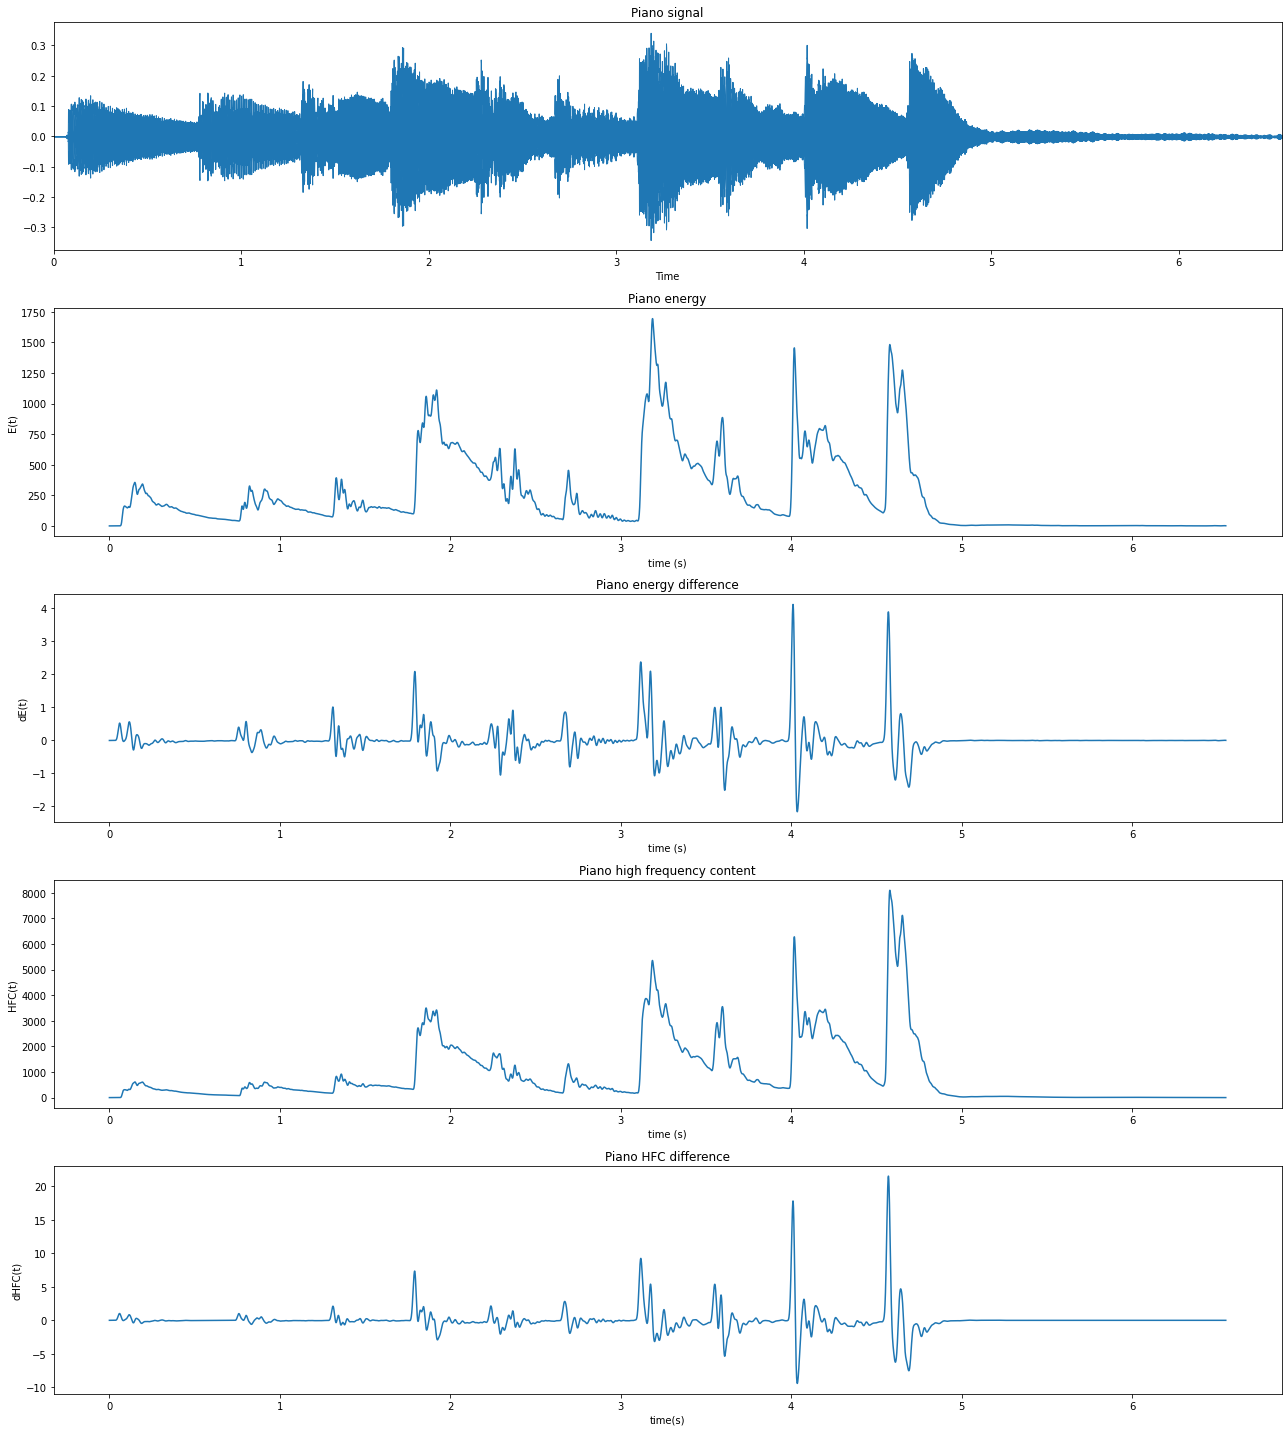

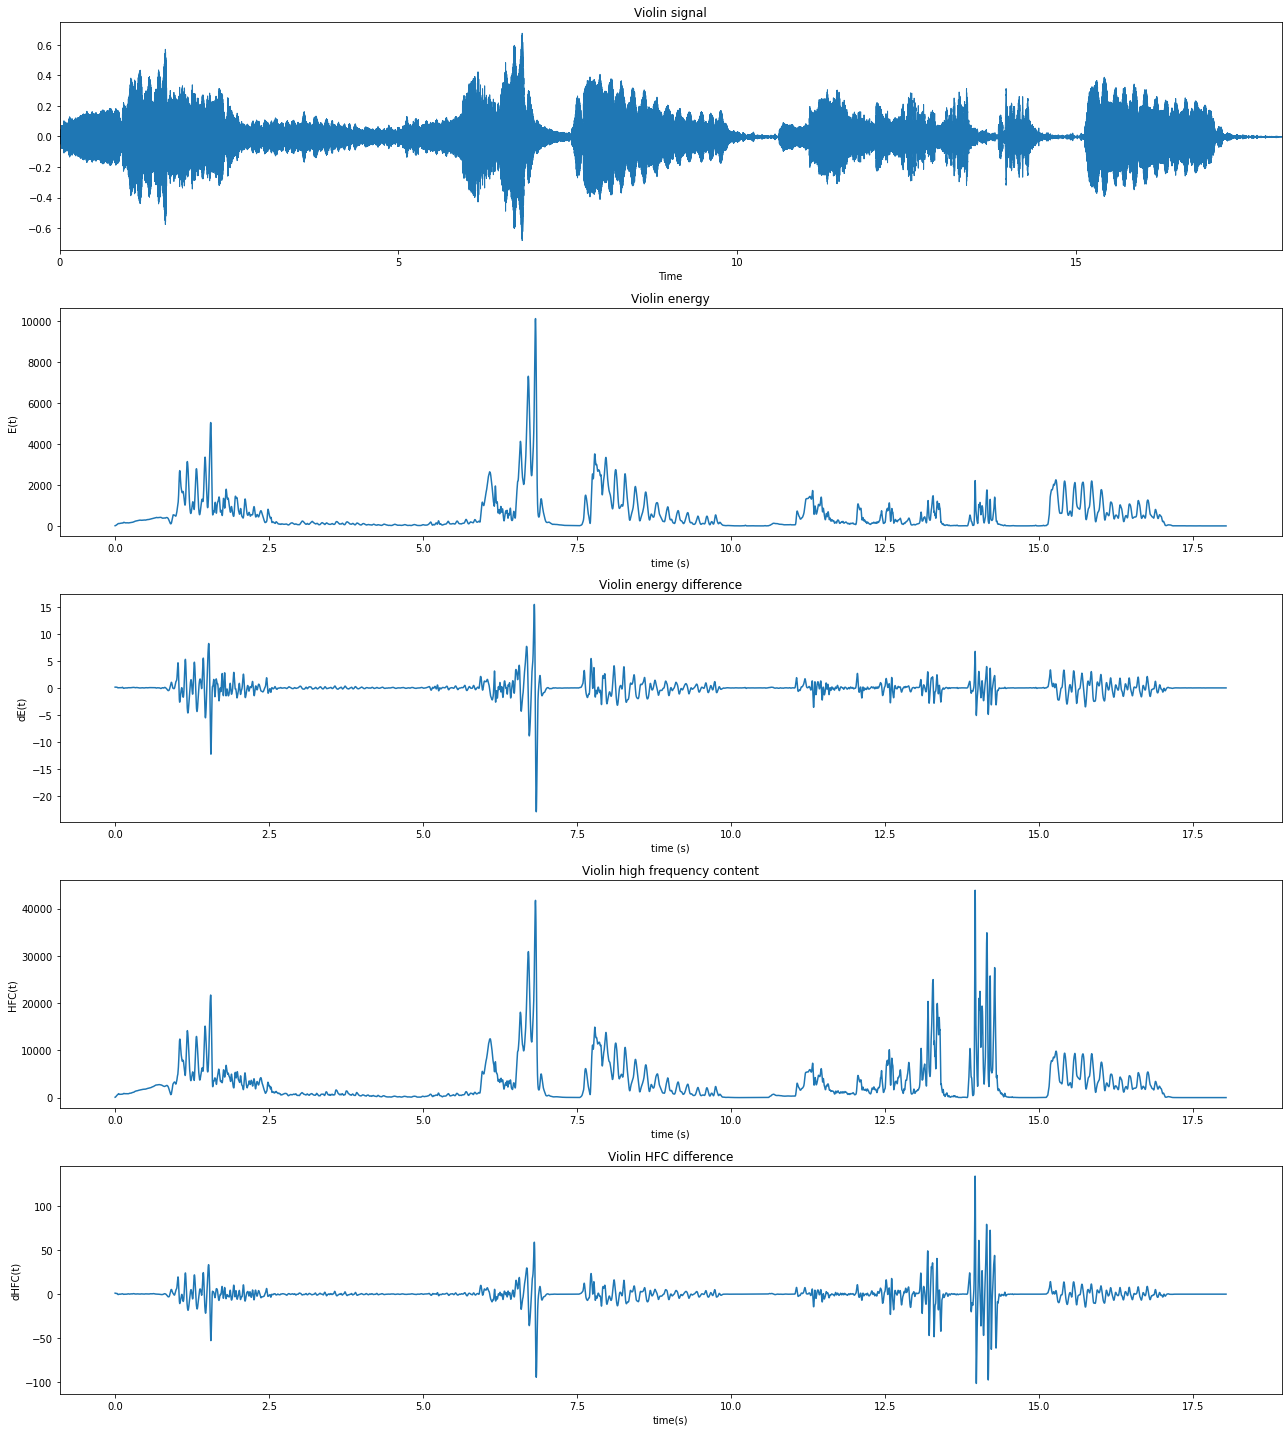

In [64]:
# Frequency Domain Onset Detection

M = 256
win = np.hamming(M)
zpf = 5
nfft = M*zpf

# piano
spec = librosa.core.stft(piano, n_fft=nfft, hop_length=1, win_length=M, window=win, center=True)
nframe = np.shape(spec)[1]

e = np.sum(np.power(np.abs(spec),2),axis=0)

diffe = np.diff(e) # first-order difference
de = np.zeros(len(diffe)-M)
for i in range(0,len(diffe)-M):
  de[i] = np.sum(np.multiply(diffe[i:i+M],window))/M

hfc = []
fi = np.linspace(0, sr/2, num=np.shape(spec)[0])
for i in range(0,nframe):
  X = spec[:,i]
  hfc.append(np.sum(np.multiply(fi,np.power(np.abs(X),2)),axis=0)/(M/2+1))


diffhfc = np.diff(hfc)
dhfc = np.zeros(len(diffhfc)-M)
for i in range(0,len(diffhfc)-M):
  dhfc[i] = np.sum(np.multiply(diffhfc[i:i+M],window))/M

ti = np.linspace(0, len(piano)/sr, num=np.shape(spec)[1])
ti_de = np.linspace(0, len(piano)/sr, num=len(de))
ti_hfc = np.linspace(0, len(piano)/sr, num=len(hfc))
ti_dhfc = np.linspace(0, len(piano)/sr, num=len(dhfc))

plt.figure(figsize=(18, 20))
plt.subplot(5,1,1)
librosa.display.waveplot(piano, sr)
plt.title('Piano signal')

plt.subplot(5,1,2)
plt.plot(ti,e)
plt.title('Piano energy')
plt.xlabel('time (s)')
plt.ylabel('E(t)')

plt.subplot(5,1,3)
plt.plot(ti_de,de)
plt.title('Piano energy difference')
plt.xlabel('time (s)')
plt.ylabel('dE(t)')

plt.subplot(5,1,4)
plt.plot(ti_hfc,hfc)
plt.title('Piano high frequency content')
plt.xlabel('time (s)')
plt.ylabel('HFC(t)')

plt.subplot(5,1,5)
plt.plot(ti_dhfc,dhfc)
plt.title('Piano HFC difference')
plt.xlabel('time(s)')
plt.ylabel('dHFC(t)')
plt.tight_layout()
plt.savefig('./piano_3_frequency_domain.png')
plt.show()

# violin
spec = librosa.core.stft(violin, n_fft=nfft, hop_length=1, win_length=M, window=win, center=True)
nframe = np.shape(spec)[1]

e = np.sum(np.power(np.abs(spec),2),axis=0)

diffe = np.diff(e)
de = np.zeros(len(diffe)-M)
for i in range(0,len(diffe)-M):
  de[i] = np.sum(np.multiply(diffe[i:i+M],window))/M

hfc = []
fi = np.linspace(0, sr/2, num=np.shape(spec)[0])
for i in range(0,nframe):
  X = spec[:,i]
  hfc.append(np.sum(np.multiply(fi,np.power(np.abs(X),2)),axis=0)/(M/2+1))


diffhfc = np.diff(hfc)
dhfc = np.zeros(len(diffhfc)-M)
for i in range(0,len(diffhfc)-M):
  dhfc[i] = np.sum(np.multiply(diffhfc[i:i+M],window))/M

ti_dhfc = np.linspace(0, len(violin)/sr, num=len(dhfc))

ti = np.linspace(0, len(violin)/sr, num=np.shape(spec)[1])
ti_de = np.linspace(0, len(violin)/sr, num=len(de))
ti_hfc = np.linspace(0, len(violin)/sr, num=len(hfc))
ti_dhfc = np.linspace(0, len(violin)/sr, num=len(dhfc))

plt.figure(figsize=(18, 20))
plt.subplot(5,1,1)
librosa.display.waveplot(violin, sr)
plt.title('Violin signal')

plt.subplot(5,1,2)
plt.plot(ti,e)
plt.title('Violin energy')
plt.xlabel('time (s)')
plt.ylabel('E(t)')

plt.subplot(5,1,3)
plt.plot(ti_de,de)
plt.title('Violin energy difference')
plt.xlabel('time (s)')
plt.ylabel('dE(t)')

plt.subplot(5,1,4)
plt.plot(ti_hfc,hfc)
plt.title('Violin high frequency content')
plt.xlabel('time (s)')
plt.ylabel('HFC(t)')

plt.subplot(5,1,5)
plt.plot(ti_dhfc,dhfc)
plt.title('Violin HFC difference')
plt.xlabel('time(s)')
plt.ylabel('dHFC(t)')
plt.tight_layout()
plt.savefig('./violin_3_frequency_domain.png')
plt.show()

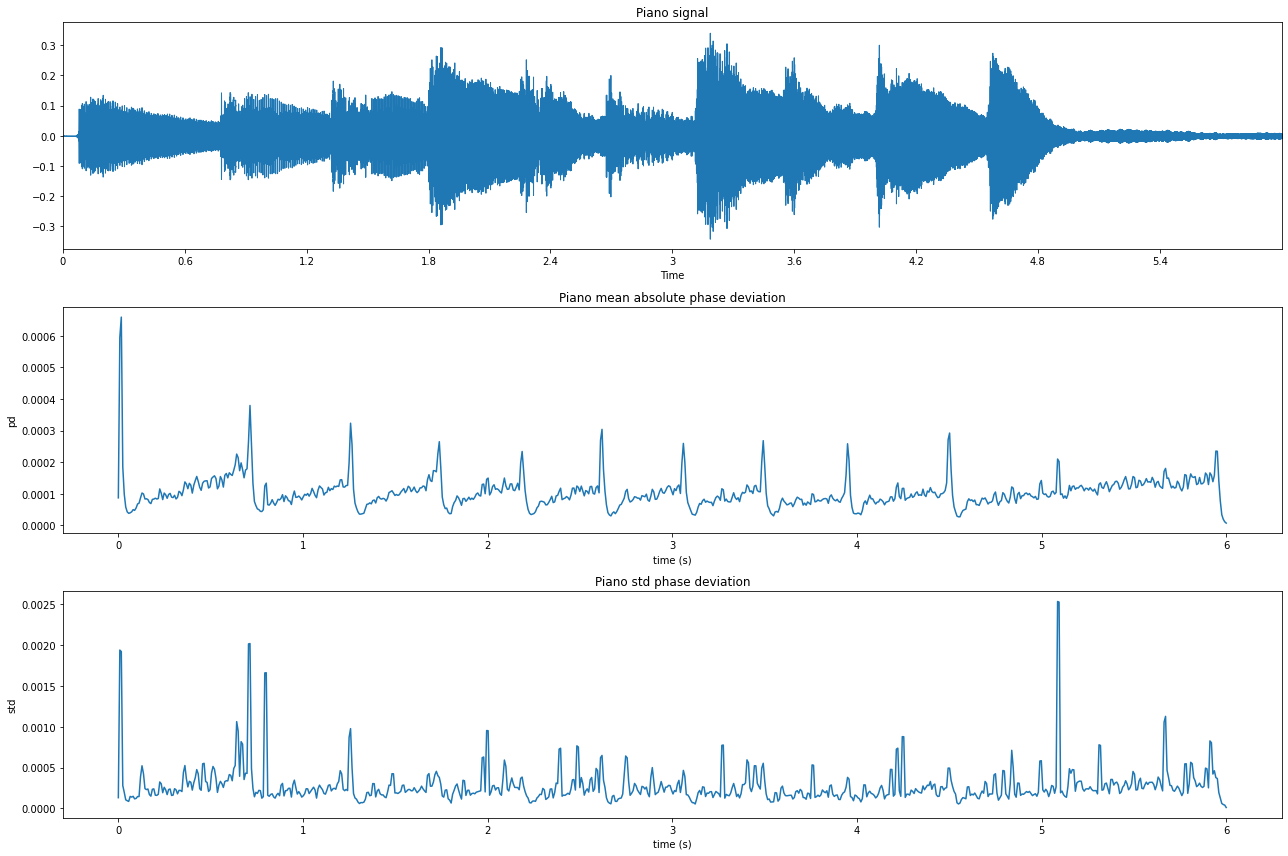

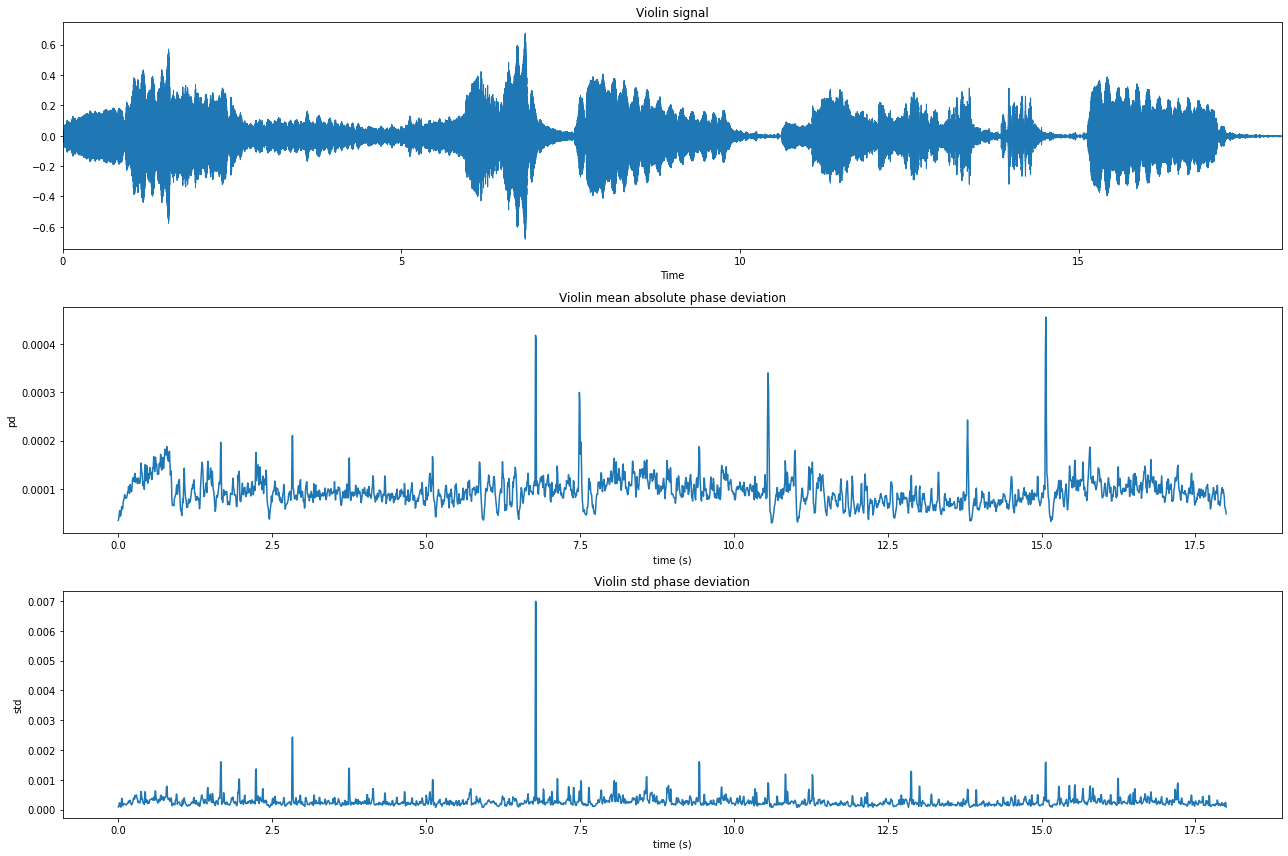

In [67]:
# Phase-based Onset Detection

M = 1024
hopsize = int(M/16)
hopfac = int(M/hopsize)
Nfft = M
overlap = Nfft*(1-1/hopfac)
win = np.ones(Nfft)

# Piano
x = piano[0:int(sr*6)]

_,_,X = signal.stft(x,fs=sr, window=win,nperseg=M,noverlap = overlap)

k = np.arange(Nfft/2 + 1)

ifr = np.zeros(np.shape(X))
T = np.zeros(np.shape(X)[1])

for i in range(0,np.shape(X)[1]):
  Xk = X[:,i]
  Xkplus1 = np.append(Xk[1:],0.000001)
  Xkminus1 = np.append(0.00001,Xk[0:-1])

  ifr[:,i] = np.multiply(sr,np.subtract(np.divide(k,Nfft),np.imag(np.multiply(1j/Nfft,np.divide(np.subtract(Xkplus1,Xkminus1),np.add(np.subtract(np.subtract(np.multiply(Xk,2),Xkplus1),Xkminus1),2*0.000001))))))
  T[i] = i*((Nfft/hopfac)/sr)
  
dif = np.divide(np.diff(ifr),sr*2*np.pi)
pd = np.mean(np.abs(dif),axis=0)

stdev = np.zeros(len(T)-1)

for i in range(0,len(T)-1):
  stdev[i] = np.std(np.abs(dif[:,i]))

ti_pd = np.linspace(0, len(x)/sr, num=len(pd))
ti_stdev = np.linspace(0, len(x)/sr, num=len(stdev))

plt.figure(figsize=(18, 12))
plt.subplot(3,1,1)
librosa.display.waveplot(x, sr)
plt.title('Piano signal')

plt.subplot(3,1,2)
plt.plot(ti_pd,pd)
plt.title('Piano mean absolute phase deviation')
plt.xlabel('time (s)')
plt.ylabel('pd')

plt.subplot(3,1,3)
plt.plot(ti_stdev,stdev)
plt.title('Piano std phase deviation')
plt.xlabel('time (s)')
plt.ylabel('std')
plt.tight_layout()
plt.savefig('./piano_3_phase_based.png')
plt.show()

# Violin
x = violin[0:int(sr*18)]

_,_,X = signal.stft(x,fs=sr, window=win,nperseg=M,noverlap = overlap)

k = np.arange(Nfft/2 + 1)

ifr = np.zeros(np.shape(X))
T = np.zeros(np.shape(X)[1])

for i in range(0,np.shape(X)[1]):
  Xk = X[:,i]
  Xkplus1 = np.append(Xk[1:],0.000001)
  Xkminus1 = np.append(0.00001,Xk[0:-1])

  ifr[:,i] = np.multiply(sr,np.subtract(np.divide(k,Nfft),np.imag(np.multiply(1j/Nfft,np.divide(np.subtract(Xkplus1,Xkminus1),np.add(np.subtract(np.subtract(np.multiply(Xk,2),Xkplus1),Xkminus1),2*0.000001))))))
  T[i] = i*((Nfft/hopfac)/sr)
  
dif = np.divide(np.diff(ifr),sr*2*np.pi)
pd = np.mean(np.abs(dif),axis=0)

stdev = np.zeros(len(T)-1)

for i in range(0,len(T)-1):
  stdev[i] = np.std(np.abs(dif[:,i]))

ti_pd = np.linspace(0, len(x)/sr, num=len(pd))
ti_stdev = np.linspace(0, len(x)/sr, num=len(stdev))

plt.figure(figsize=(18, 12))
plt.subplot(3,1,1)
librosa.display.waveplot(x, sr)
plt.title('Violin signal')

plt.subplot(3,1,2)
plt.plot(ti_pd,pd)
plt.title('Violin mean absolute phase deviation')
plt.xlabel('time (s)')
plt.ylabel('pd')

plt.subplot(3,1,3)
plt.plot(ti_stdev,stdev)
plt.title('Violin std phase deviation')
plt.xlabel('time (s)')
plt.ylabel('std')
plt.tight_layout()
plt.savefig('./violin_3_phase_based.png')
plt.show()


---


2.   Chord Recognition Using Chromagram (40 pts)
 
 Lab3 has an algorithm that estimates a musical chord from a chroma feature.
 
*   a. Write a python function that takes as inputs an audio file name and returns a chord sequence at the frame level.

*   b. Run your chord recognition function on the audio file prelude_cmaj_short_11k.wav, and plot the chord sequence. (Please ignore 7th note. Consider all chords as triad chords)


In [38]:
# a)
'''
The PCP, CQT_fast, compute_chroma functions are borrowed from
code by Orchisama Das, Stanford
https://github.com/orchidas
'''

with open('./lab3/chord_templates.json', 'r') as fp:
    templates_json = json.load(fp)

chords = ['N','G','G#','A','A#','B','C','C#','D','D#','E','F','F#','Gm','G#m','Am','A#m','Bm','Cm','C#m','Dm','D#m','Em','Fm','F#m']
templates = []

for chord in chords:
    if chord == 'N':
        continue
    templates.append(templates_json[chord])

def PCP(cqt,bins,M):
    CH = np.zeros(bins)
    for b in range(bins):
        CH[b] = np.sum(cqt[b + (np.arange(M)*bins)])
    return CH

def CQT_fast(x,fs,bins,fmin,fmax,M):
    threshold = 0.0054 #for Hamming window
    K = int(bins*np.ceil(np.log2(fmax/fmin)))
    Q = 1/(2**(1/bins)-1)
    nfft = np.int32(2**np.ceil(np.log2((np.ceil(Q*fs/fmin)))))
    tempKernel = np.zeros(nfft, dtype = np.complex)
    specKernel = np.zeros(nfft, dtype = np.complex)
    sparKernel = []

    #create sparse Kernel 
    for k in range(K-1,-1,-1):
        fk = (2**(k/bins))*fmin
        N = np.int32(np.round((Q*fs)/fk))
        tempKernel[:N] = hamming(N)/N * np.exp(-2*np.pi*1j*Q*np.arange(N)/N)
        specKernel = fft(tempKernel)
        specKernel[np.where(np.abs(specKernel) <= threshold)] = 0
        if k == K-1:
            sparKernel = specKernel
        else:
            sparKernel = np.vstack((specKernel, sparKernel))

    sparKernel = np.transpose(np.conjugate(sparKernel))/nfft
    ft = fft(x,nfft)
    cqt = np.dot(ft, sparKernel)
    ft = fft(x,nfft*(2**M))
    return cqt    

def compute_chroma(x,fs):
    fmin = 96
    fmax = 5250
    bins = 12
    M = 3
    nOctave = np.int32(np.ceil(np.log2(fmax/fmin)))
    CH = np.zeros(bins)
    #Compute constant Q transform
    cqt_fast = CQT_fast(x,fs,bins,fmin,fmax,M)
    #get Pitch Class Profile
    CH = PCP(np.absolute(cqt_fast), bins, nOctave)
    return CH

def chord_seq(audio_path):
    x, fs = librosa.load(audio_path, sr=None)
    x = x[::4]
    fs_re = int(fs/4)

    nfft = 8192
    hop_size = 1024
    nFrames = int(np.round(len(x)/(nfft-hop_size)))

    x = np.append(x, np.zeros(nfft))
    xFrame = np.empty((nfft, nFrames))
    start = 0   
    chroma = np.empty((12,nFrames)) 
    id_chord = np.zeros(nFrames, dtype='int32')
    timestamp = np.zeros(nFrames)
    max_cor = np.zeros(nFrames)

    S = np.abs(librosa.stft(x, n_fft=1024))**2
    chroma = librosa.feature.chroma_stft(S=S, sr=fs_re)

    for n in range(nFrames):
        xFrame[:,n] = x[start:start+nfft] 
        start = start + nfft - hop_size 
        timestamp[n] = n*(nfft-hop_size)/fs_re
        chroma[:,n] = compute_chroma(xFrame[:,n],fs_re)

        cor_vec = np.zeros(24)
        for ni in range(24):
            cor_vec[ni] = np.correlate(chroma[:,n], np.array(templates[ni])) 
        max_cor[n] = np.max(cor_vec)
        id_chord[n] =  np.argmax(cor_vec) + 1

    id_chord[np.where(max_cor < 0.2*np.max(max_cor))] = 0

    return id_chord, timestamp

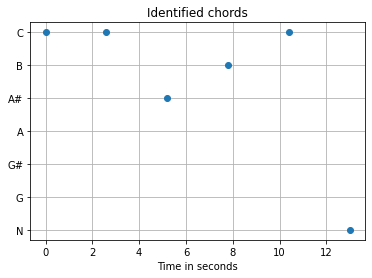

In [41]:
# b)
prelude = './lab3/wav/prelude_cmaj_short_11k.wav'
# prelude = './lab3/wav/Grand Piano - Fazioli - minor chords - G#m higher.wav'
chord, t = chord_seq(prelude)
plt.figure()
plt.yticks(np.arange(25), chords)
plt.plot(t, chord, linestyle='none', marker='o')
plt.xlabel('Time in seconds')
plt.title('Identified chords')
plt.grid(True)
plt.show()